<a href="https://colab.research.google.com/github/Sushant1805/DL-Assignments/blob/main/Object_Detection_Sushant_Bhosale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning

**Lab Title:** Yolo11 -Model-Application Name

**Student Name:** Sushant Arjun Bhosale

**Student ID:**202302040002

**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [1]:
# Code Task 1
!nvidia-smi
!pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import Image

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [2]:
!wget -O /content/data.zip https://s3.us-west-1.amazonaws.com/evanjuras.com/resources/YOLO_coin_data_12DEC30.zip # Coin dataset

--2025-04-14 18:29:42--  https://s3.us-west-1.amazonaws.com/evanjuras.com/resources/YOLO_coin_data_12DEC30.zip
Resolving s3.us-west-1.amazonaws.com (s3.us-west-1.amazonaws.com)... 52.219.116.64, 52.219.216.56, 52.219.216.64, ...
Connecting to s3.us-west-1.amazonaws.com (s3.us-west-1.amazonaws.com)|52.219.116.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233373348 (223M) [application/zip]
Saving to: ‘/content/data.zip’

/content/data.zip   100%[===================>] 222.56M  71.3MB/s    in 3.1s    

2025-04-14 18:29:45 (71.3 MB/s) - ‘/content/data.zip’ saved [233373348/233373348]



In [3]:
!unzip -q /content/data.zip -d /content/custom_data

In [4]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-04-14 18:29:54--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-04-14 18:29:54 (57.6 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 750
Number of annotation files: 750
Images moving to train: 675
Images moving to validation: 75



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [5]:
#code for task 3

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 4
names:
- penny
- nickel
- dime
- quarter


In [6]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=30 imgsz=640

100% 18.4M/18.4M [00:00<00:00, 130MB/s] 
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/75 /content/data/validation/images/IMG_3391.JPG: 640x480 1 penny, 2 dimes, 1 quarter, 44.1ms
image 2/75 /content/data/validation/images/IMG_3400.JPG: 640x480 2 nickels, 1 quarter, 12.3ms
image 3/75 /content/data/validation/images/IMG_3403.JPG: 640x480 1 penny, 1 quarter, 12.3ms
image 4/75 /content/data/validation/images/IMG_3407.JPG: 640x480 1 penny, 1 dime, 1 quarter, 12.3ms
image 5/75 /content/data/validation/images/IMG_3437.JPG: 640x480 1 nickel, 2 dimes, 12.3ms
image 6/75 /content/data/validation/images/IMG_3439.JPG: 640x480 2 pennys, 12.3ms
image 7/75 /content/data/validation/images/IMG_3447.JPG: 640x480 1 penny, 1 dime, 1 quarter, 12.3ms
image 8/75 /content/data/validation/images/IMG_3449.JPG: 640x480 2 quarters, 12.3ms
image 9/75 /content/data/validation/images/IMG_3458.JPG: 640x480 3 pennys, 12.3ms
image 

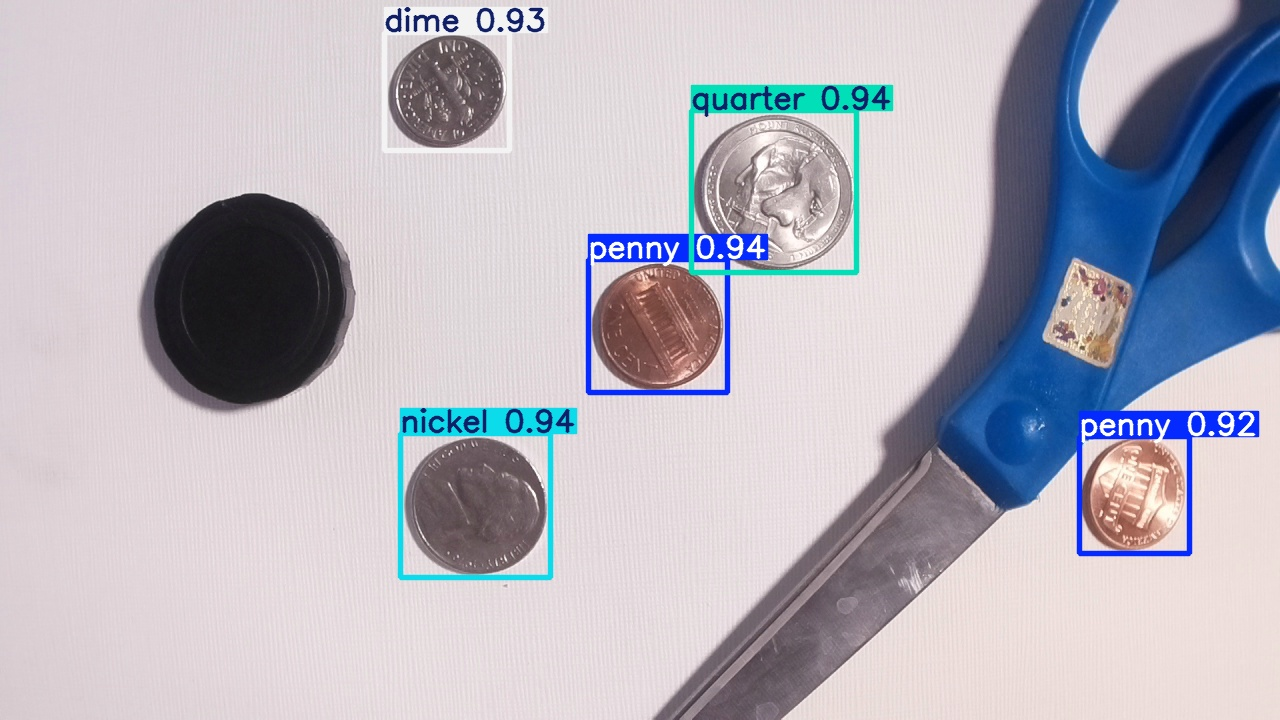

In [7]:
# Code for Task 4
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[1:2]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [8]:
!yolo detect val model=runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/data/validation/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  2.47it/s]
                   all         75        283      0.975      0.982      0.993      0.929
                 penny         55         79      0.987          1      0.995      0.926
                nickel         48         76          1      0.929      0.992      0.911
                  dime         42         55      0.978          1      0.995      0.939
               quarter         53         73      0.933          1       0.99      0.939
Speed: 0.2ms preprocess, 12.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs

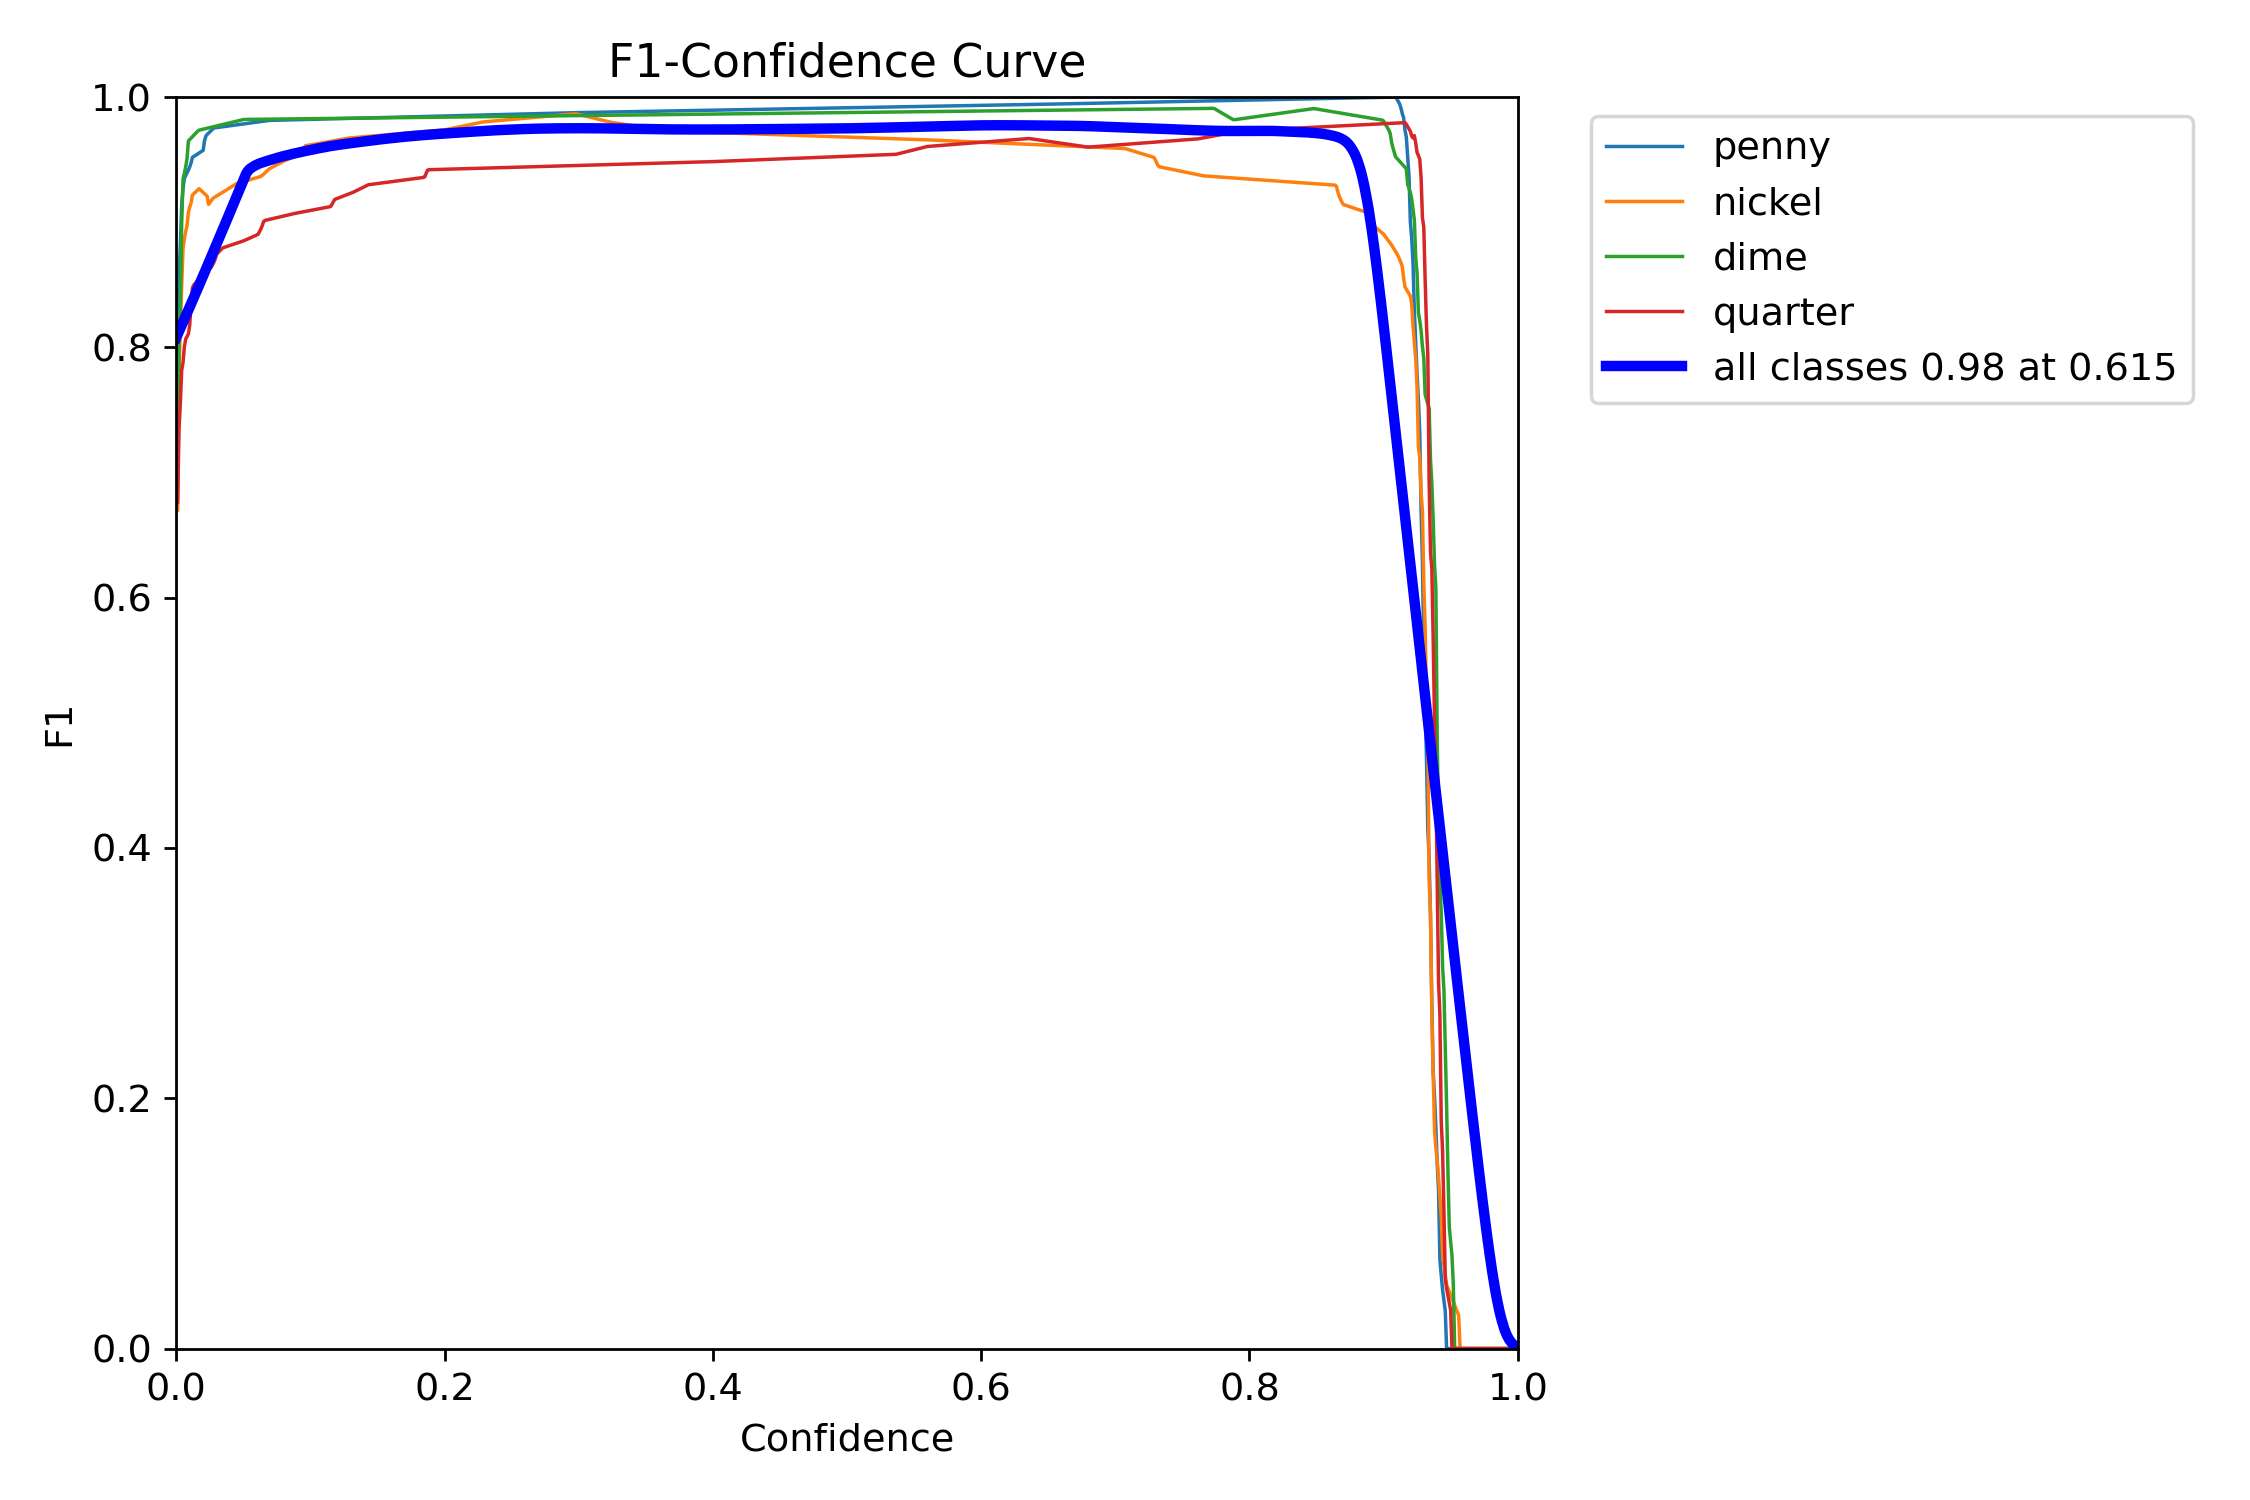

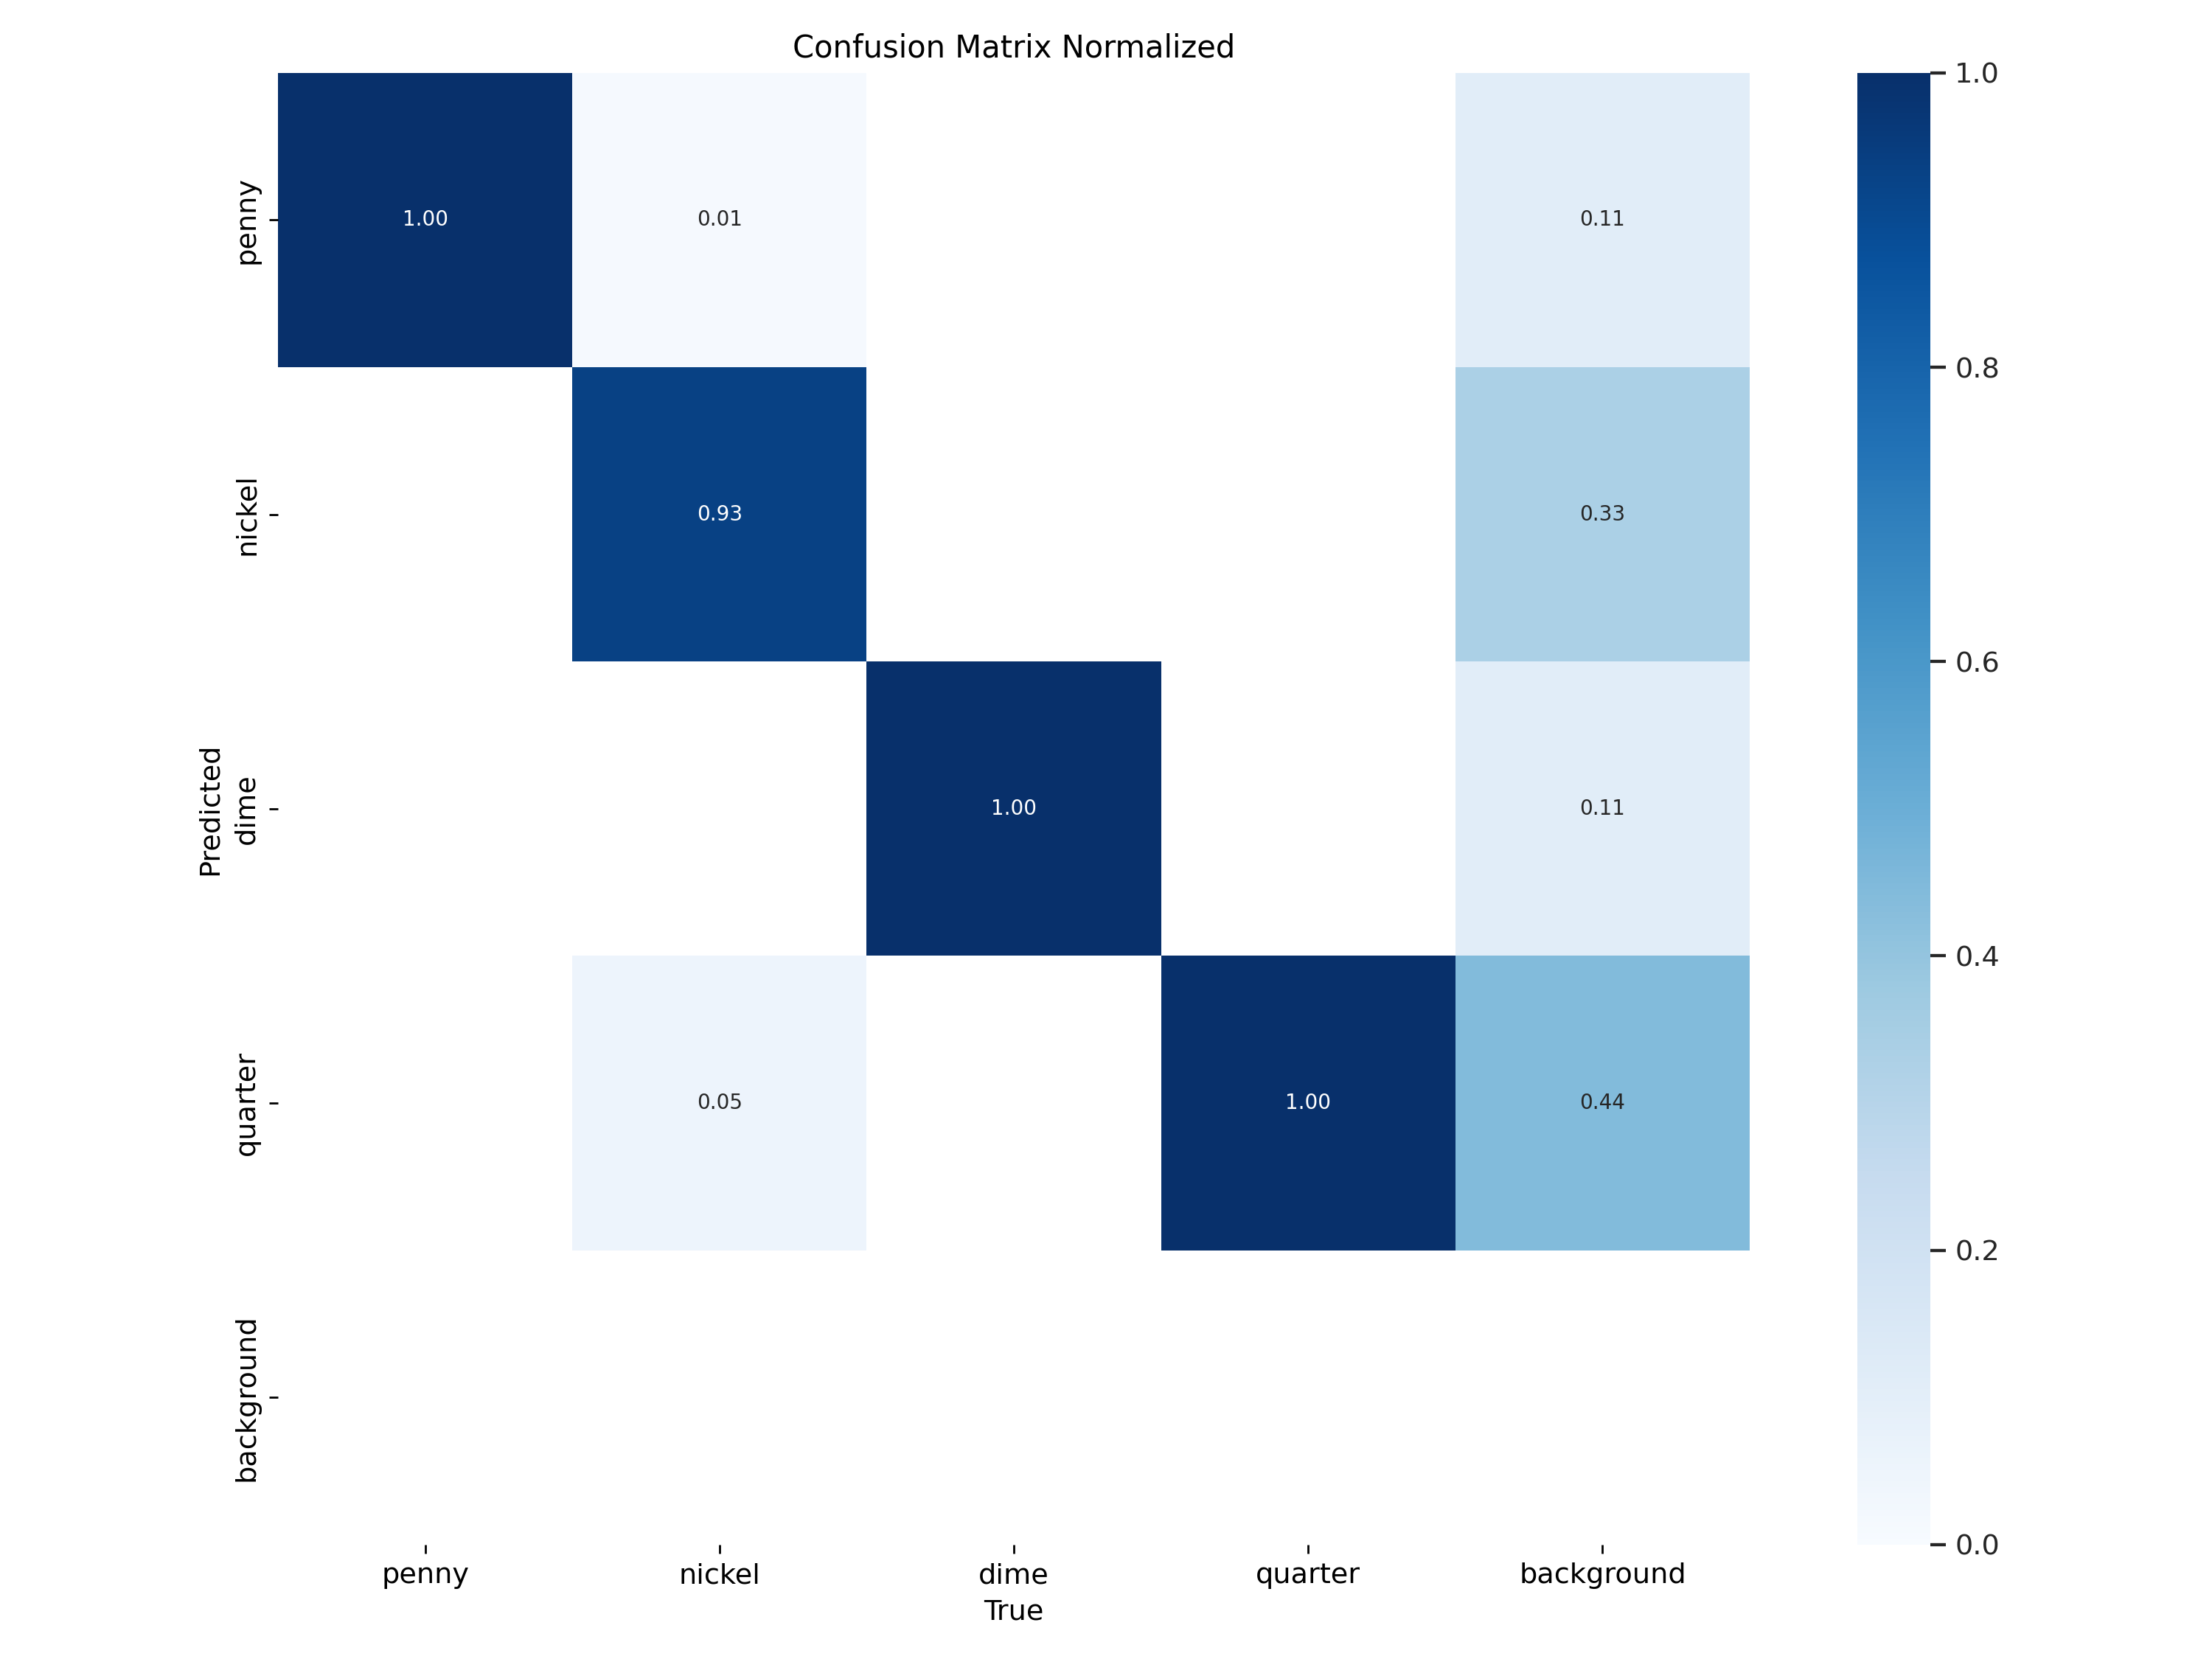

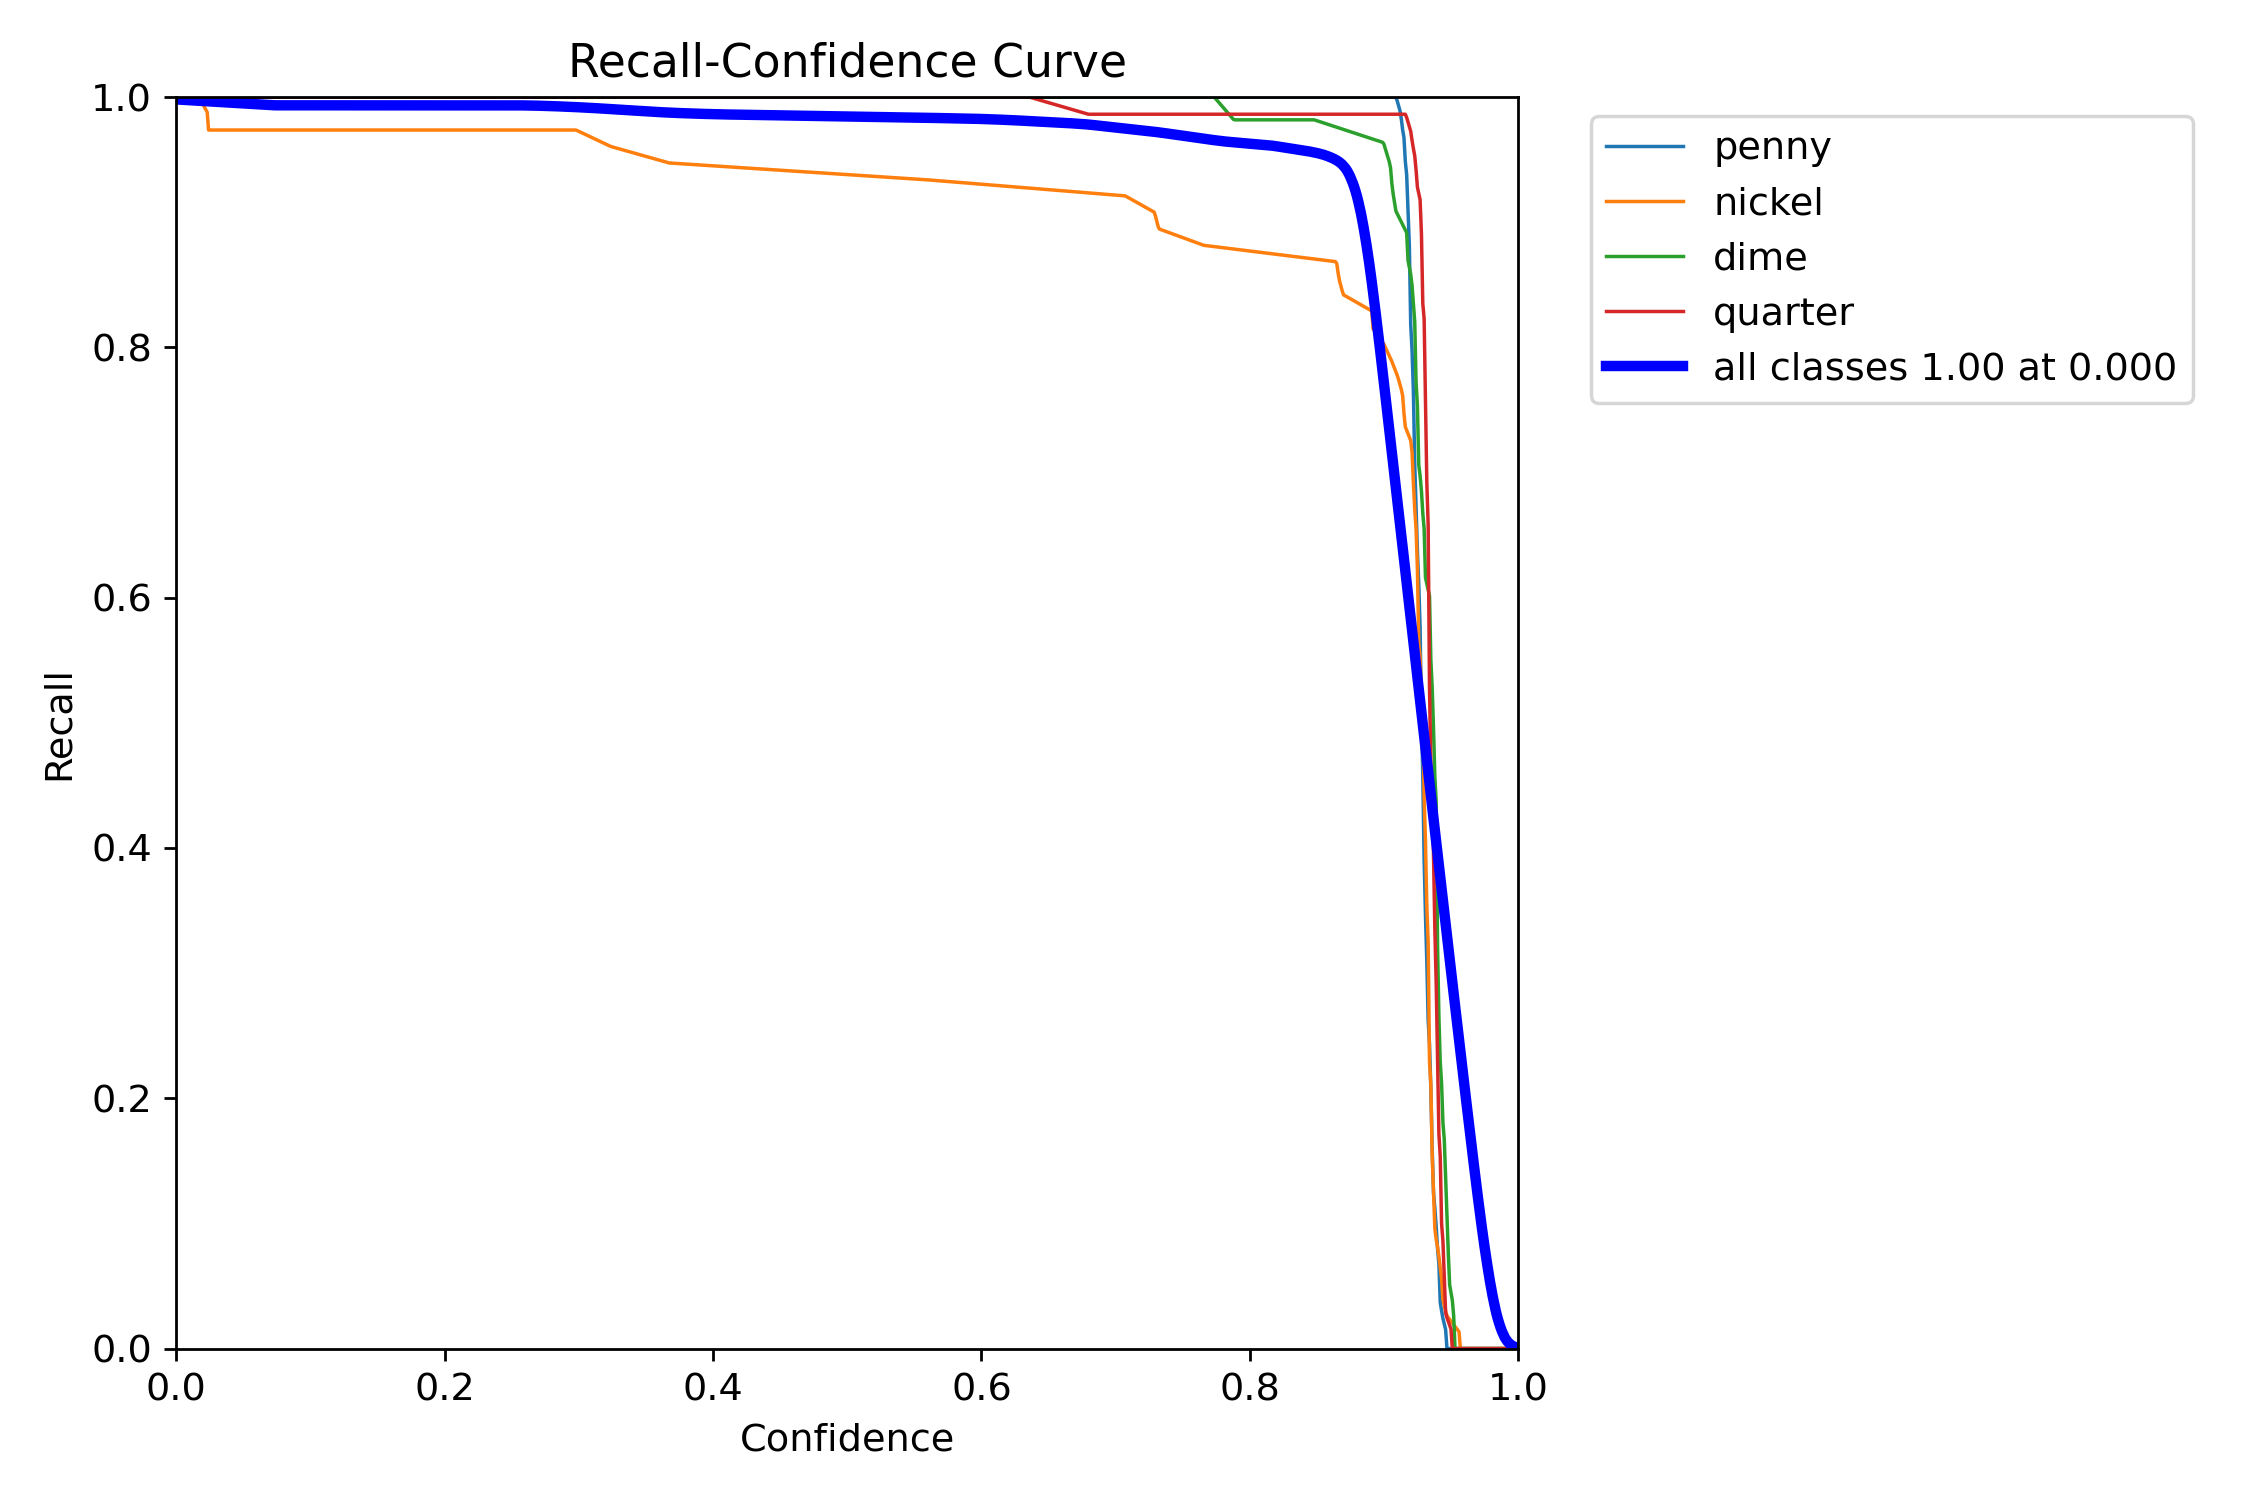

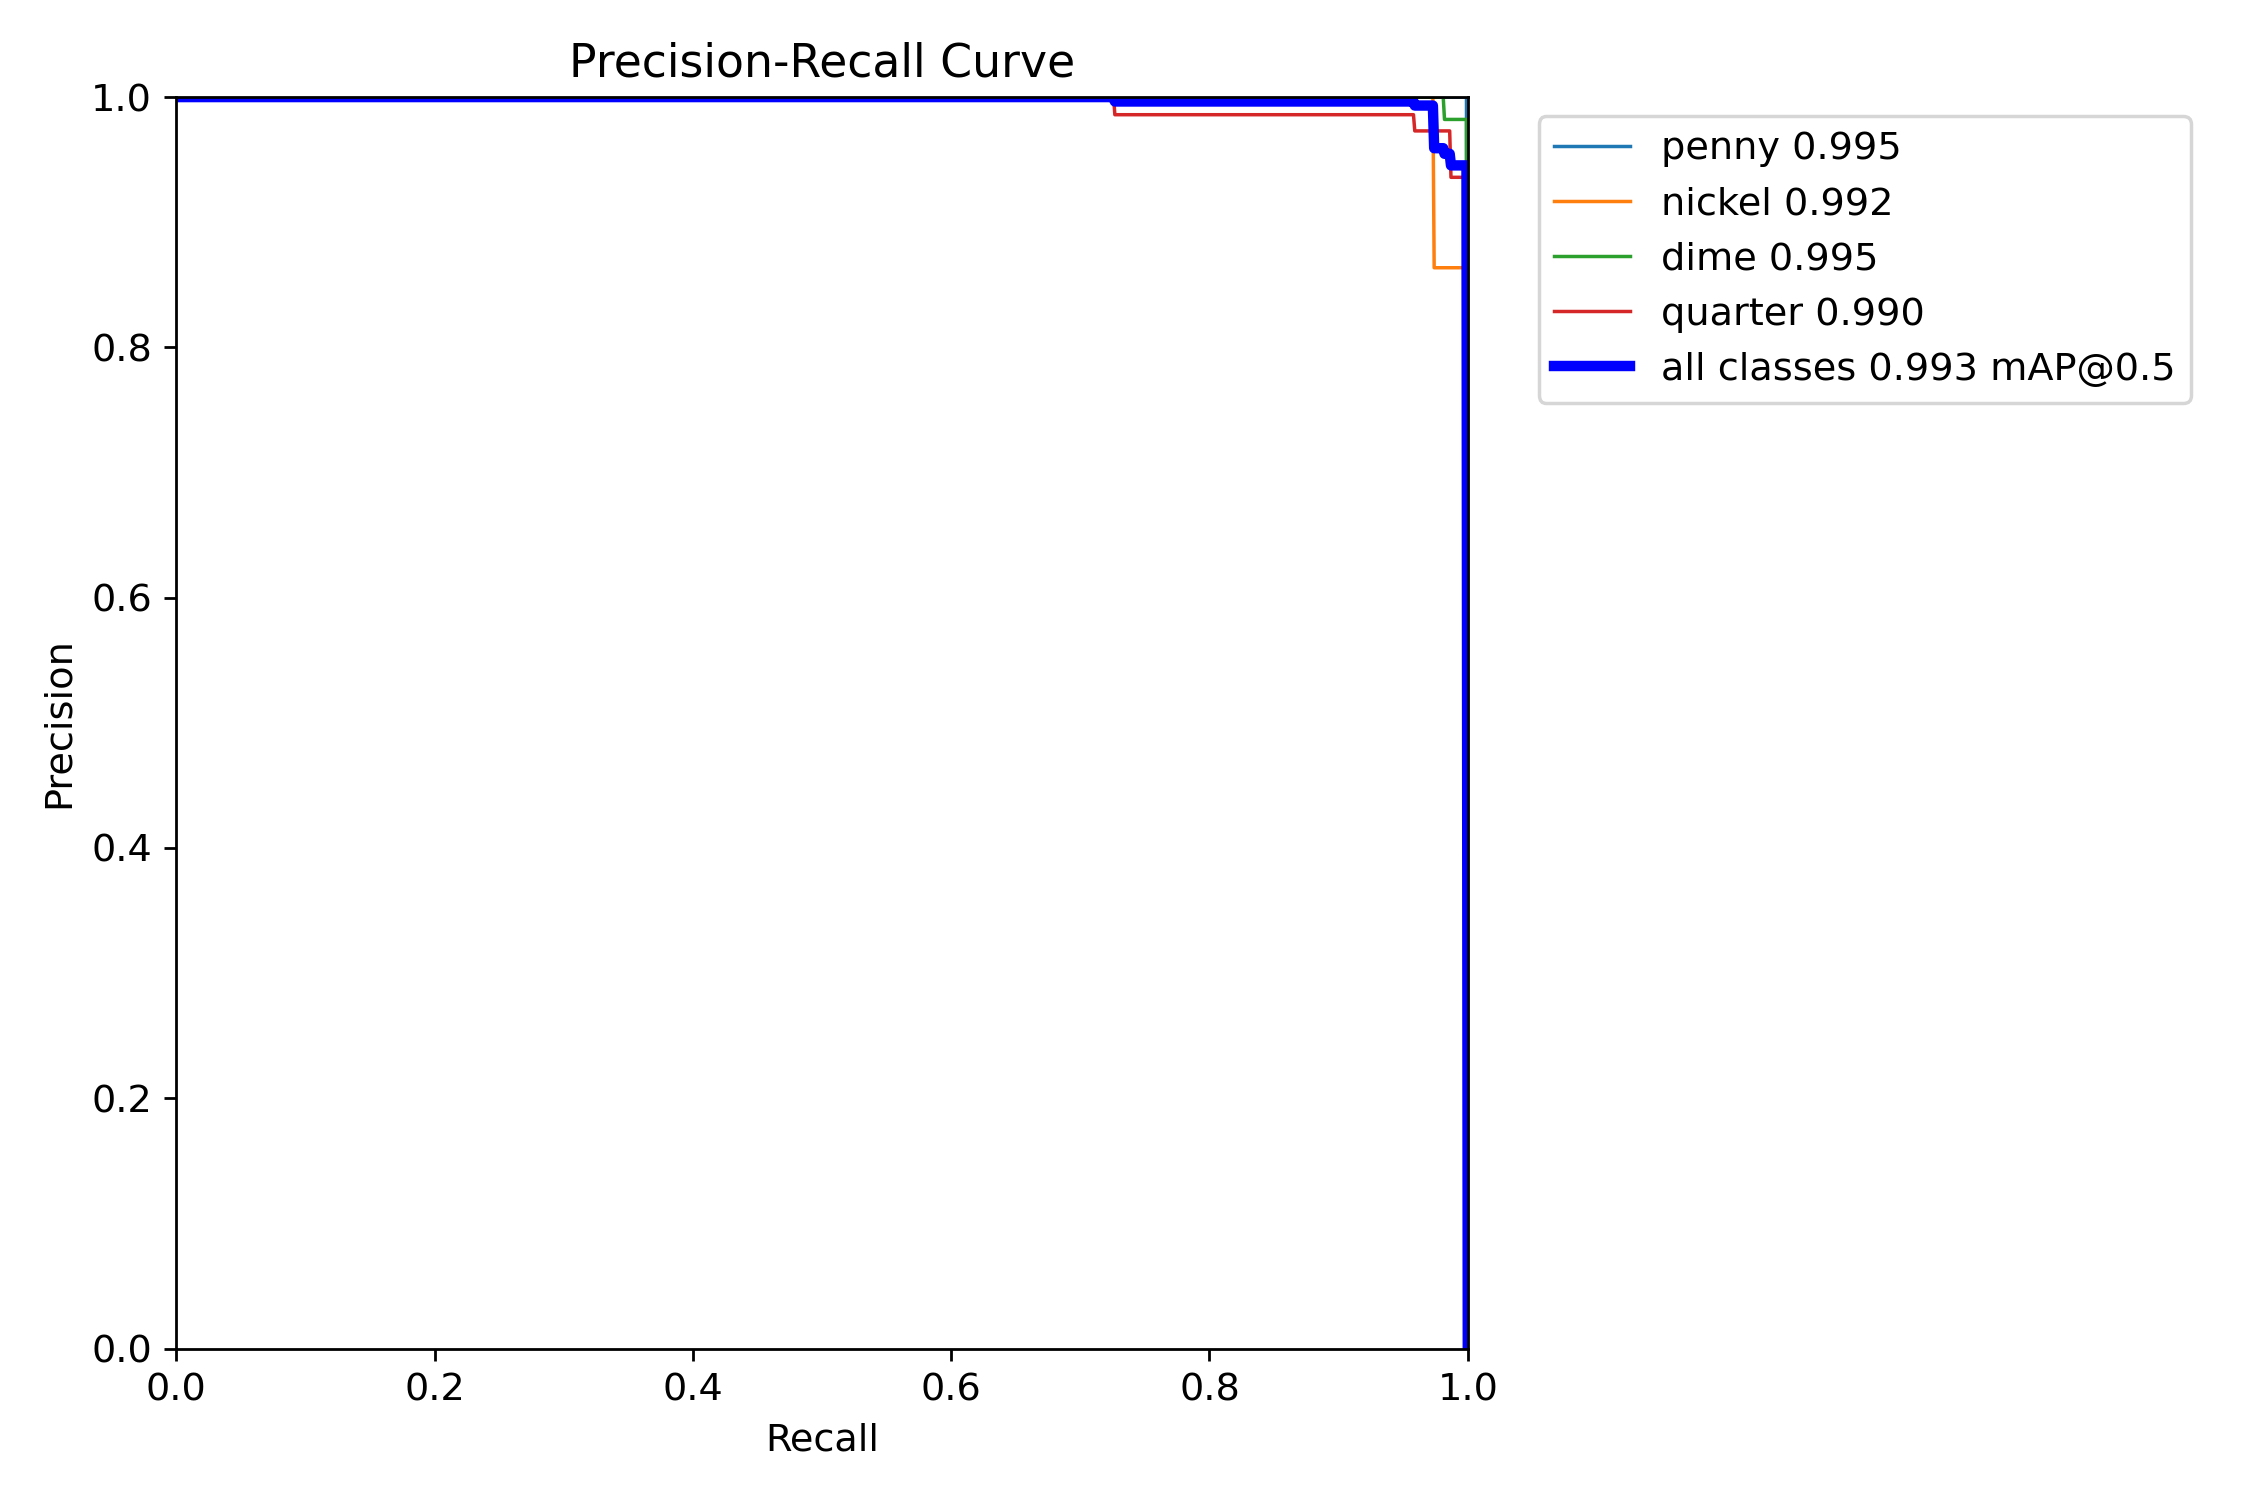

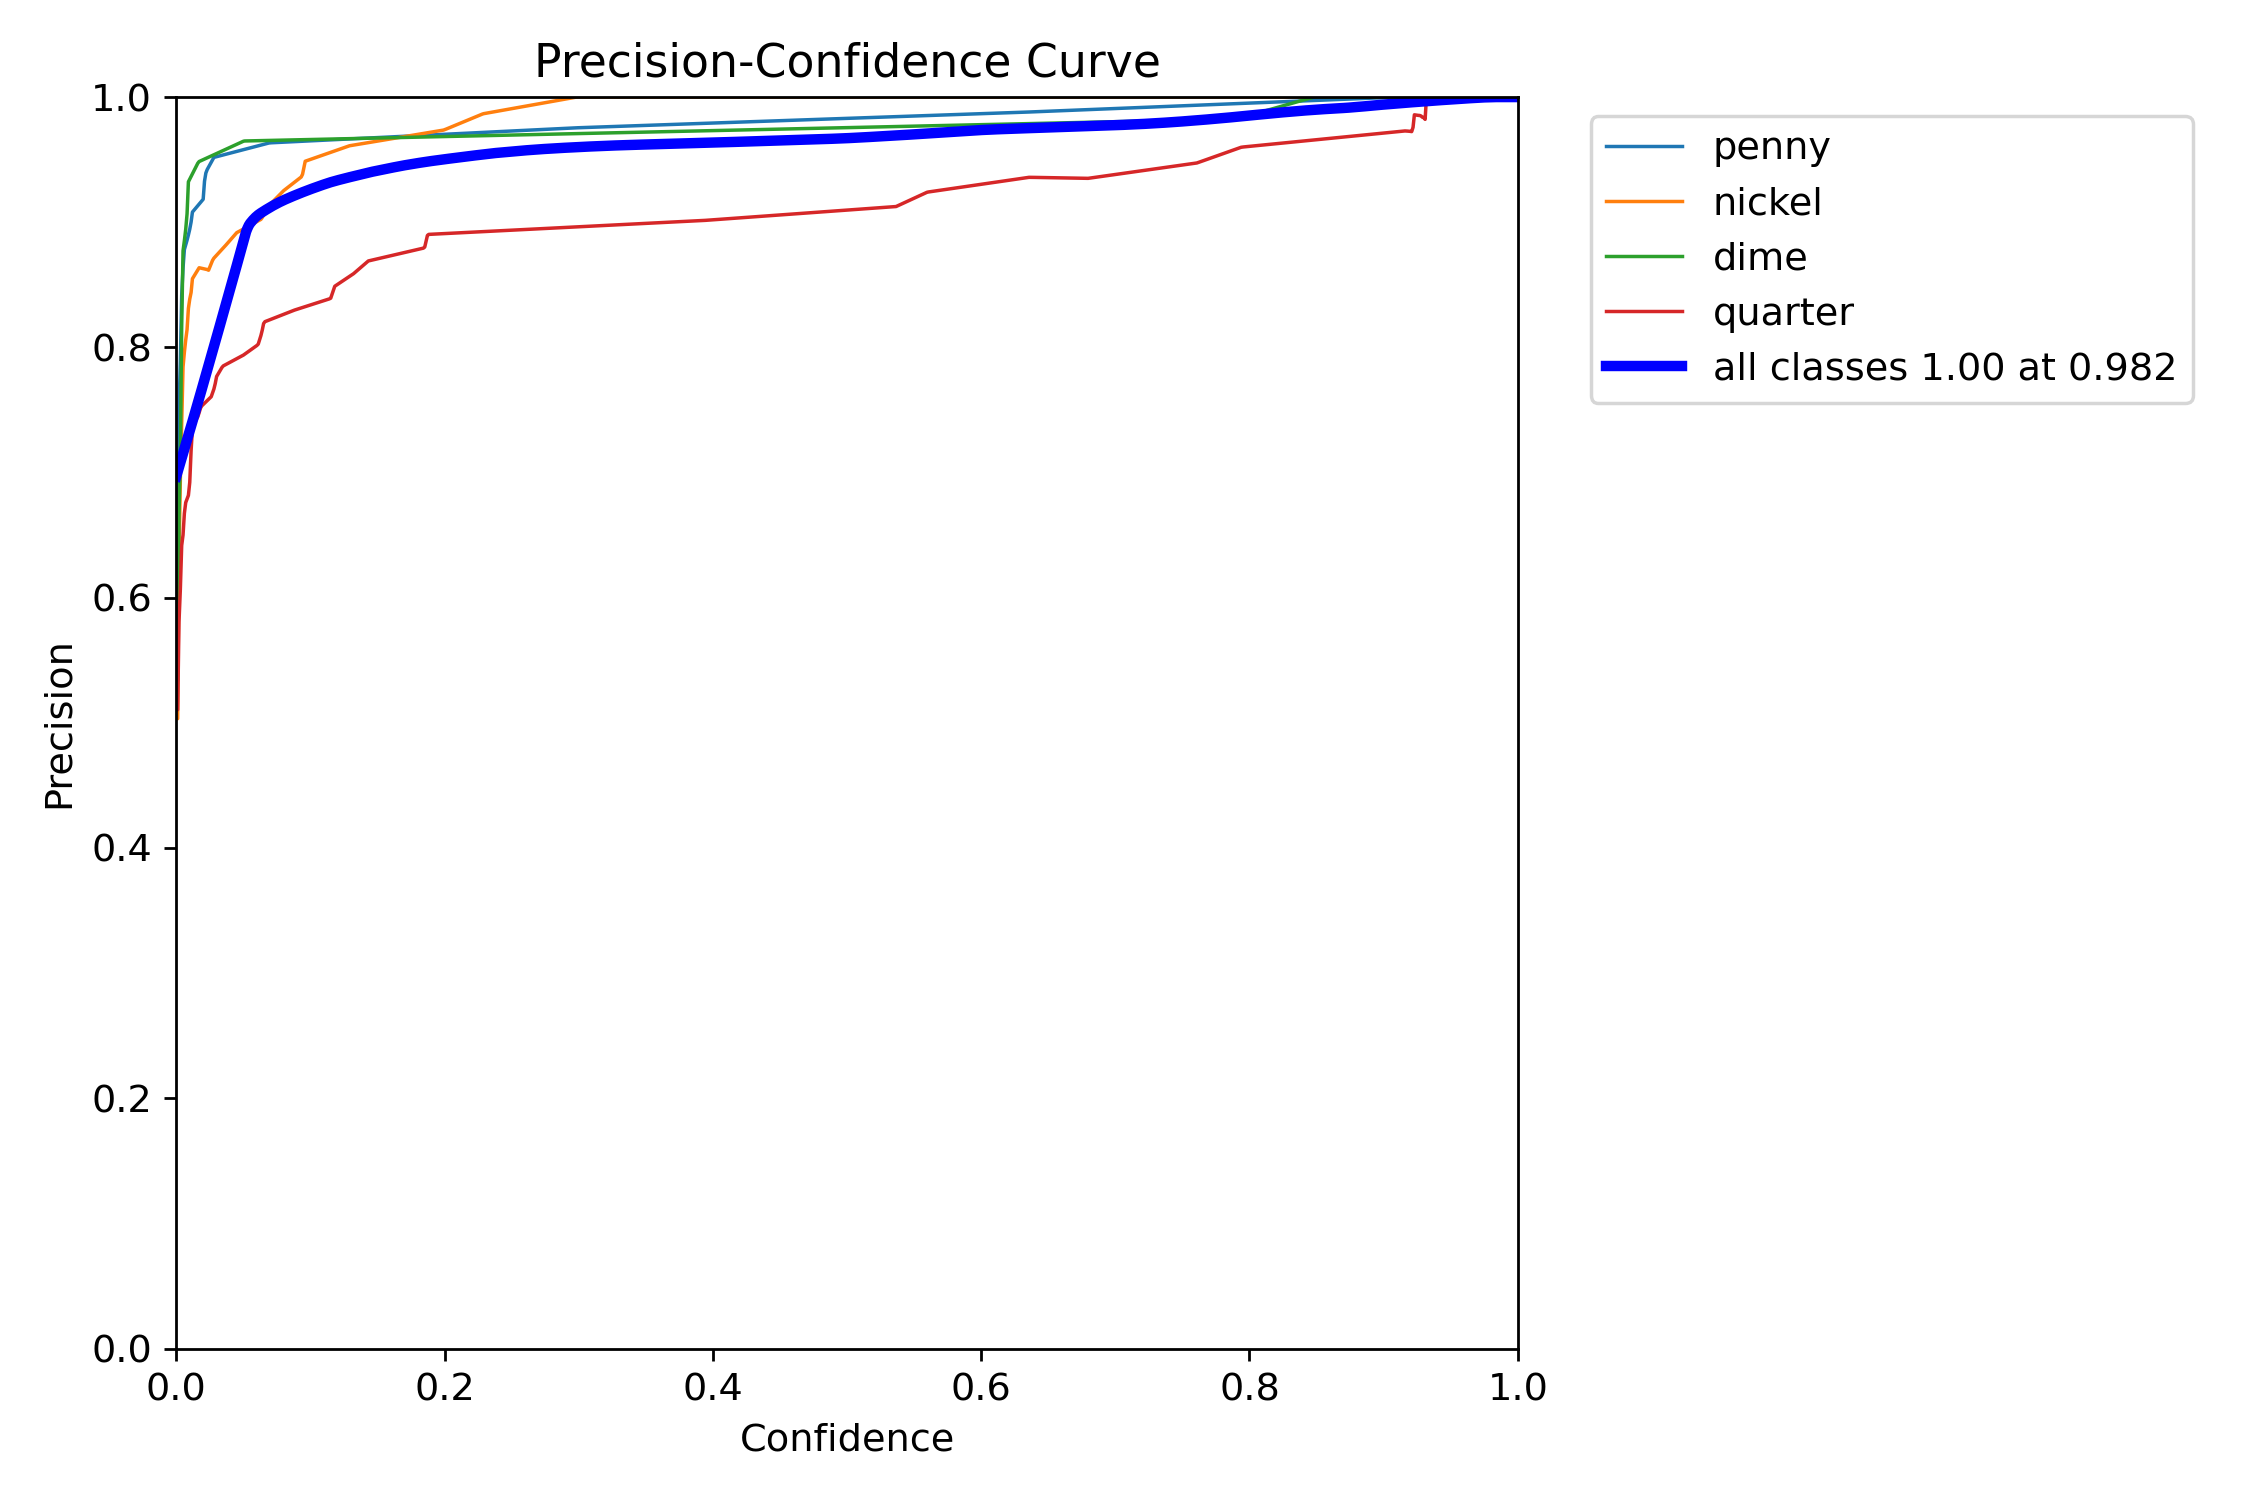

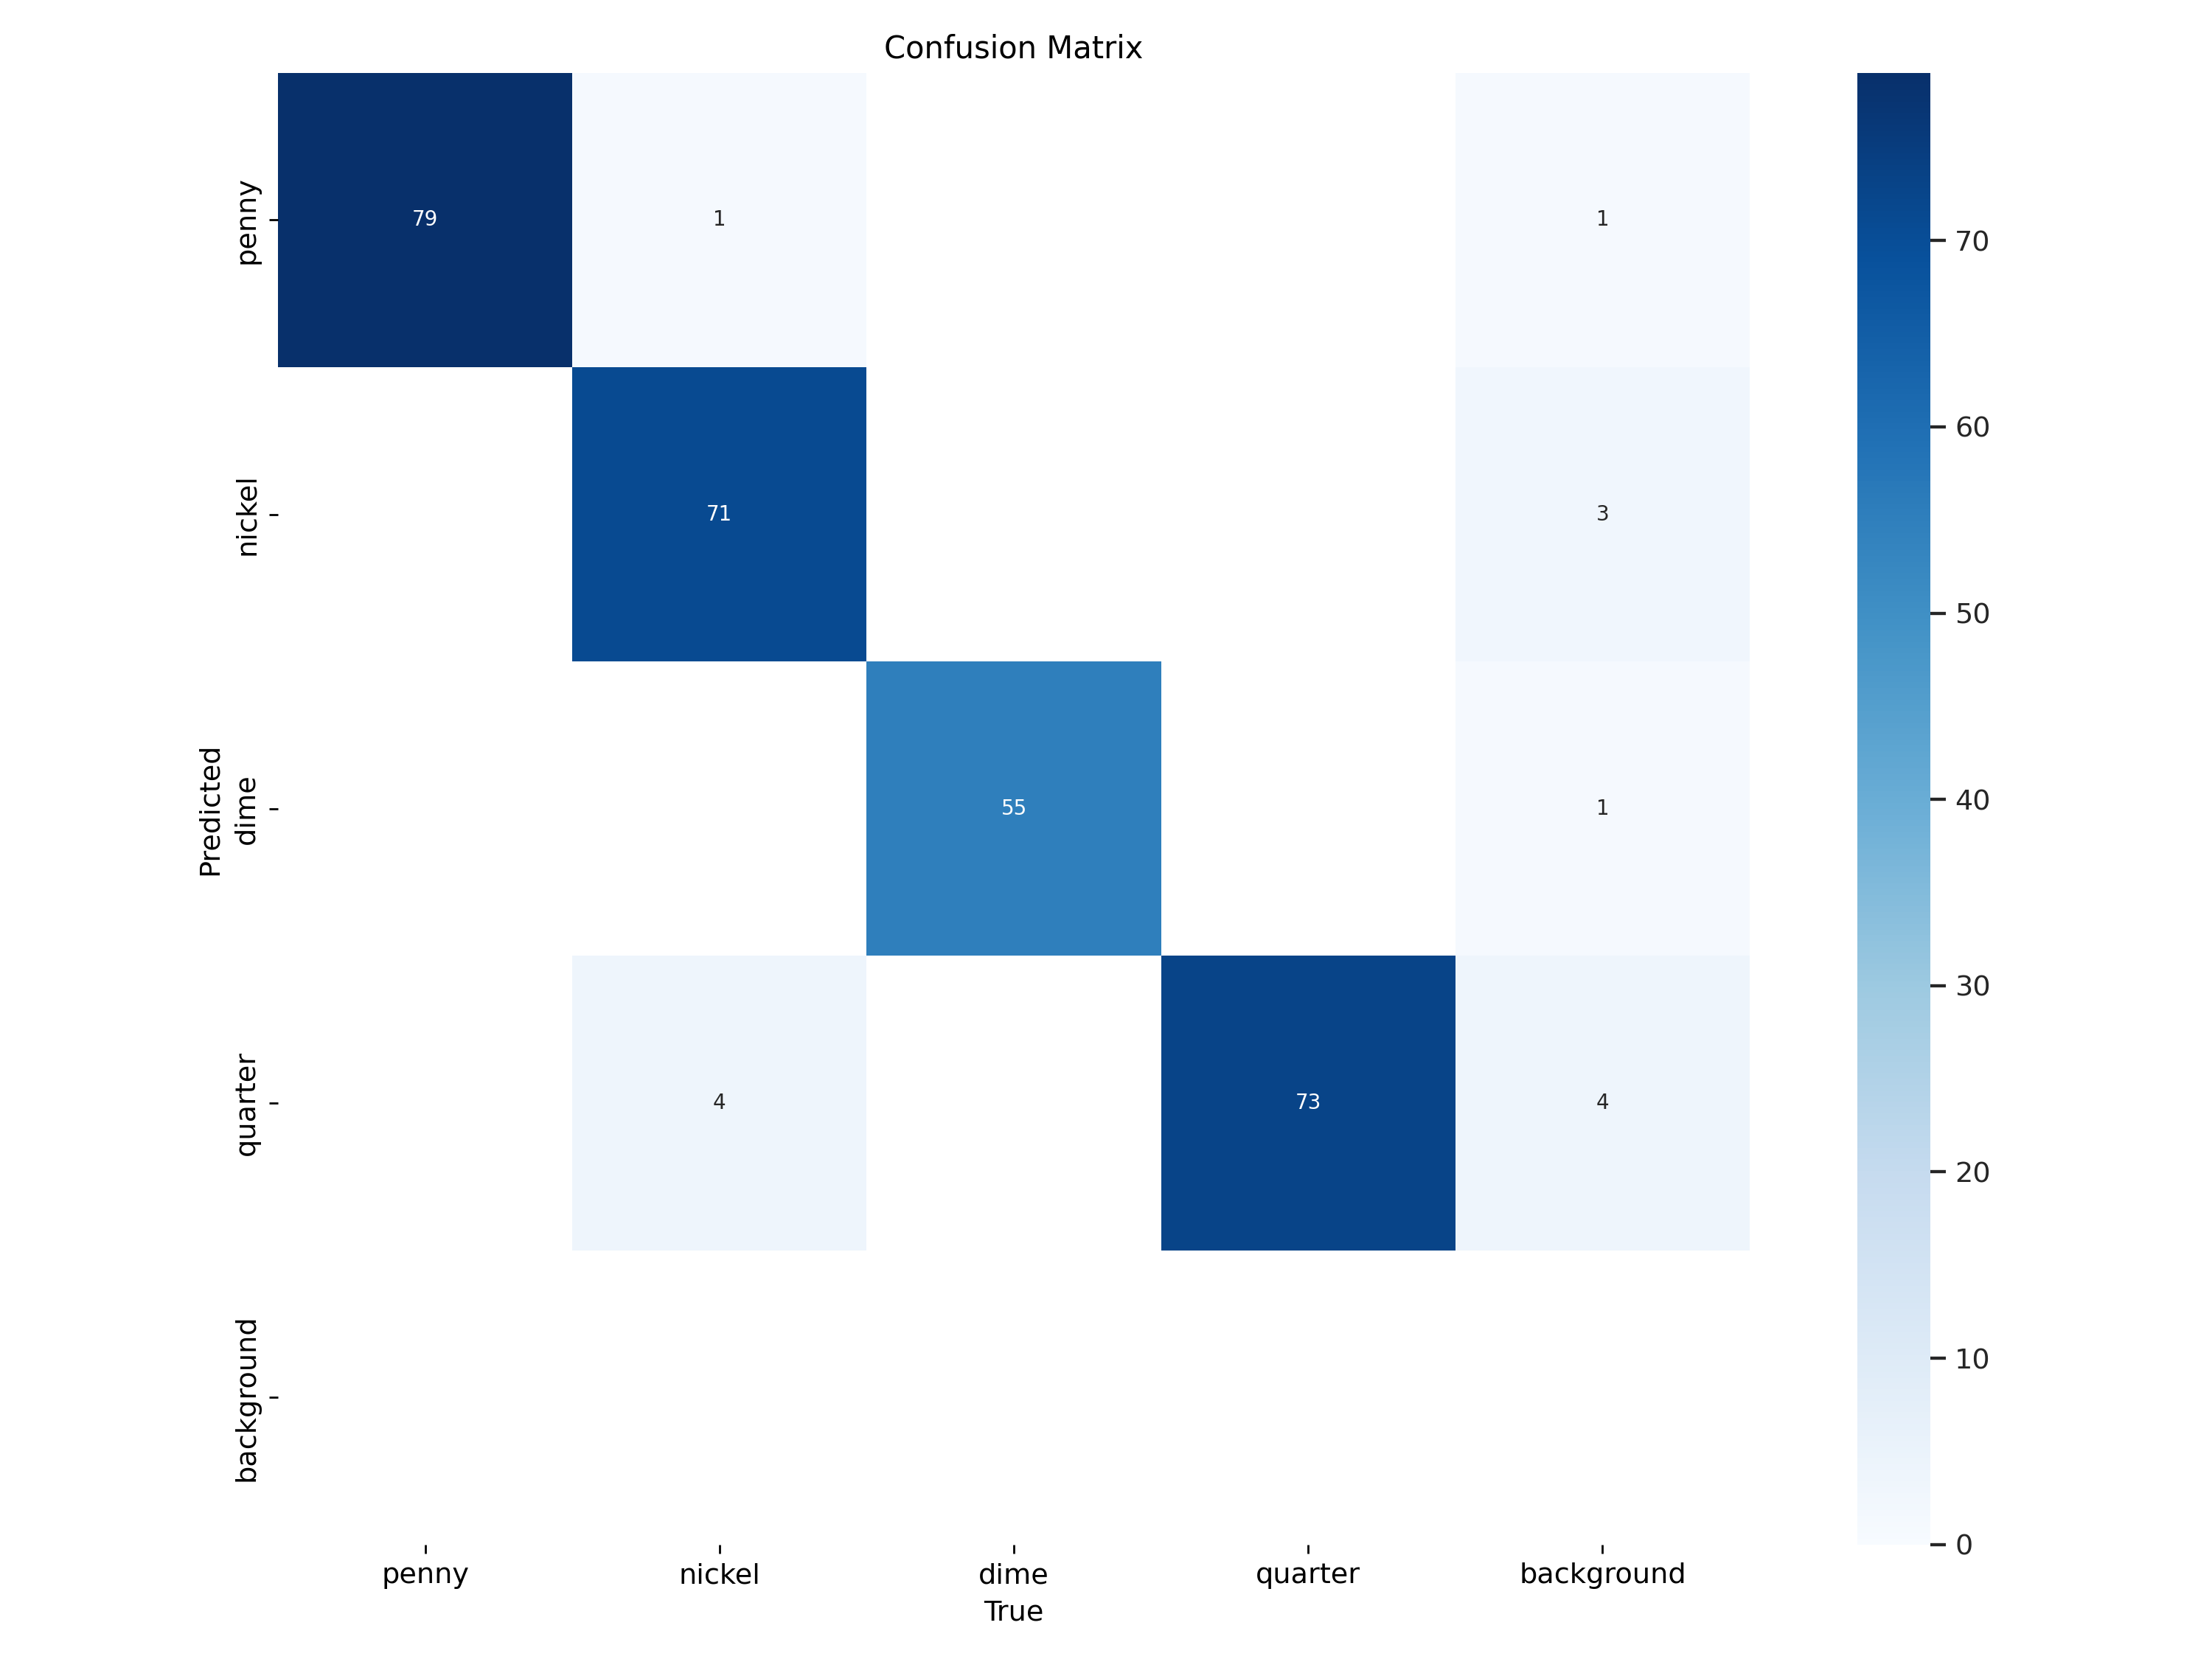

In [9]:
import glob
from IPython.display import Image, display

# Adjust if your path is different
val_path = '/content/runs/detect/val'

# Show all performance plots
plot_files = glob.glob(val_path + '/*.png')

for plot in plot_files:
    display(Image(filename=plot))


**Declaration**

I, Sushant Bhosale, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Vivek561211/Candy-Detection-using-yolo11

Signature: Sushant Bhosale

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion